In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [6]:
# On lit les données
df = pd.read_csv("heart.csv")

In [7]:
#Les 5 premières lignes de nos donées
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
df.shape

(303, 14)

In [16]:
#Nous avons toutes les informations sur l'age des patients
True in [x for x in df['age'].isna()] 

False

In [21]:
#compte le nombre de femmes et d'hommes dans nos donées
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Pourcentage de patients n'ayant pas une maladie cardiaque: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Pourcentage de patients n'ayant pas une maladie cardiaque: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Pourcentage de patients n'ayant pas une maladie cardiaque: 45.54%
Pourcentage de patients n'ayant pas une maladie cardiaque: 54.46%


In [34]:
df1,df2 = df.query("sex==0"),df.query("sex==1")

<Figure size 432x288 with 0 Axes>

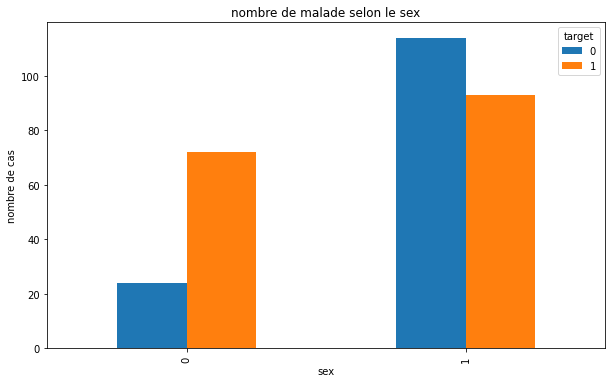

In [90]:
fig = plt.figure()

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,6))
plt.title('nombre de malade selon le sex')
plt.xlabel('sex')
plt.ylabel('nombre de cas')
plt.show()

In [63]:
pclass_xt = pd.crosstab(df['sex'], df['target'])
pclass_xt

target,0,1
sex,,
0,24,72
1,114,93


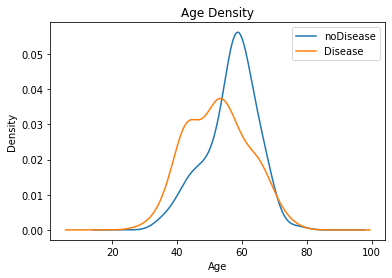

In [72]:
for target in [0,1]:
    df.age[df.target == target].plot(kind='kde')
    
plt.title('Age Density')
plt.xlabel('Age')
plt.legend(('noDisease', 'Disease'), loc='best')

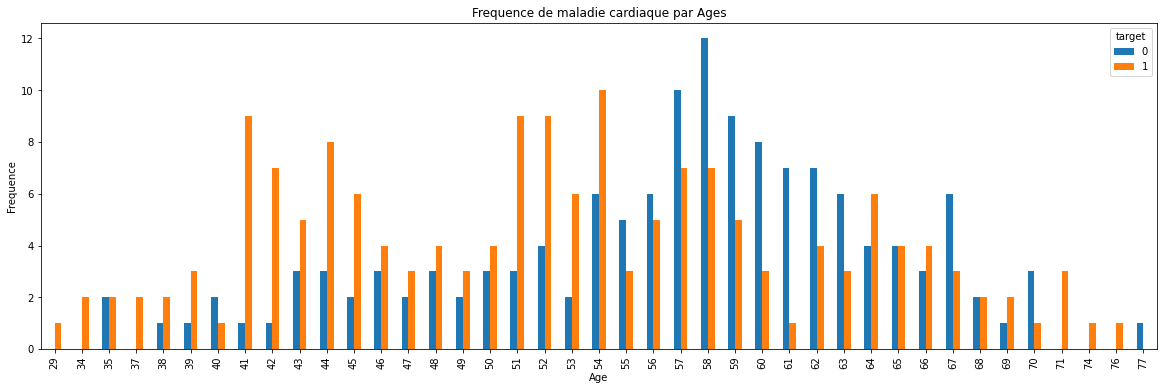

In [85]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Frequence de maladie cardiaque par Ages')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


array([[-0.07016128, -1.54191762,  0.99180393]])

In [91]:
df_train = df.drop(["cp","fbs","restecg","exang","oldpeak","slope","ca","thal","thalach","trestbps"],axis=1)

In [92]:
df_train

,age,sex,chol,target
0,63,1,233,1
1,37,1,250,1
2,41,0,204,1
3,56,1,236,1
4,57,0,354,1
...,...,...,...,...
298,57,0,241,0
299,45,1,264,0
300,68,1,193,0
301,57,1,131,0


In [95]:
lr = LogisticRegression()
lr.fit(X = df_train.values[:, :3],
       y = df_train.values[:, -1])
lr.coef_

array([[-0.06144914, -1.52879515, -0.00448746]])

100